In [20]:
import random
import numpy as np
import torch
SEED = 8050
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

In [1]:
import pandas as pd
df_train = pd.read_csv('./emotion_text/train.txt',delimiter=';',names = ['posts','label'])
df_test = pd.read_csv('./emotion_text/test.txt',delimiter=';',names = ['posts','label'])
df_val = pd.read_csv('./emotion_text/val.txt',delimiter=';',names = ['posts','label'])
df = pd.concat([df_train, df_test,df_val])
df.head()

,posts,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [2]:
df.shape

(20000, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   posts   20000 non-null  object
 1   label   20000 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


In [4]:
df.isnull().sum()

posts    0
label    0
dtype: int64

In [5]:
df.posts[0]

0                              i didnt feel humiliated
0    im feeling rather rotten so im not very ambiti...
0    im feeling quite sad and sorry for myself but ...
Name: posts, dtype: object

In [6]:
types = df.label.values
types = types.tolist()
types

['sadness',
 'sadness',
 'anger',
 'love',
 'anger',
 'sadness',
 'surprise',
 'fear',
 'joy',
 'love',
 'sadness',
 'joy',
 'anger',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'fear',
 'joy',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'joy',
 'joy',
 'fear',
 'surprise',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'love',
 'joy',
 'anger',
 'joy',
 'sadness',
 'anger',
 'fear',
 'joy',
 'sadness',
 'sadness',
 'surprise',
 'joy',
 'joy',
 'joy',
 'love',
 'fear',
 'fear',
 'surprise',
 'anger',
 'anger',
 'sadness',
 'love',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'fear',
 'love',
 'anger',
 'sadness',
 'anger',
 'love',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'anger',
 'love',
 'joy',
 '

In [7]:
a = df['label'].unique()
label = a.tolist()
label_dict = {}
for i in range(len(label)):
    label_dict[label[i]] = i

end = []

for i in types:
    end.append(int(label_dict[i]))
end

labels = end
labels

[0,
 0,
 1,
 2,
 1,
 0,
 3,
 4,
 5,
 2,
 0,
 5,
 1,
 0,
 5,
 5,
 0,
 0,
 0,
 4,
 1,
 4,
 5,
 5,
 1,
 0,
 0,
 0,
 1,
 5,
 5,
 4,
 3,
 1,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 0,
 0,
 5,
 2,
 5,
 1,
 5,
 0,
 1,
 4,
 5,
 0,
 0,
 3,
 5,
 5,
 5,
 2,
 4,
 4,
 3,
 1,
 1,
 0,
 2,
 5,
 0,
 0,
 5,
 0,
 0,
 0,
 5,
 5,
 5,
 1,
 0,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 0,
 4,
 2,
 1,
 0,
 1,
 2,
 0,
 5,
 5,
 0,
 1,
 2,
 5,
 5,
 5,
 0,
 5,
 5,
 5,
 5,
 0,
 5,
 5,
 2,
 0,
 0,
 5,
 5,
 0,
 5,
 5,
 4,
 4,
 4,
 0,
 2,
 5,
 5,
 2,
 4,
 3,
 5,
 5,
 5,
 5,
 1,
 4,
 5,
 1,
 2,
 1,
 0,
 5,
 0,
 1,
 5,
 3,
 0,
 1,
 1,
 0,
 5,
 4,
 5,
 5,
 4,
 0,
 3,
 3,
 5,
 1,
 4,
 1,
 0,
 1,
 0,
 4,
 0,
 5,
 3,
 4,
 5,
 1,
 5,
 1,
 5,
 4,
 4,
 0,
 5,
 5,
 0,
 3,
 5,
 4,
 5,
 0,
 5,
 5,
 5,
 4,
 5,
 3,
 5,
 1,
 0,
 0,
 5,
 1,
 0,
 5,
 5,
 3,
 5,
 4,
 5,
 4,
 0,
 4,
 2,
 0,
 4,
 2,
 0,
 0,
 1,
 5,
 2,
 1,
 0,
 3,
 1,
 5,
 0,
 1,
 5,
 5,
 5,
 5,
 5,
 0,
 5,
 2,
 5,
 0,
 1,
 3,
 5,
 1,
 5,
 2,
 0,
 0,
 5,
 0,
 0,
 5,
 0,
 5,
 5,
 5,


In [18]:
label_dict

{'sadness': 0, 'anger': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'joy': 5}

In [8]:
from transformers import BertTokenizer, BertConfig,AdamW, BertForSequenceClassification,get_linear_schedule_with_warmup

Init Plugin
Init Graph Optimizer
Init Kernel


In [9]:
posts = df.posts.values
print(df.label.value_counts())

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: label, dtype: int64


<AxesSubplot:>

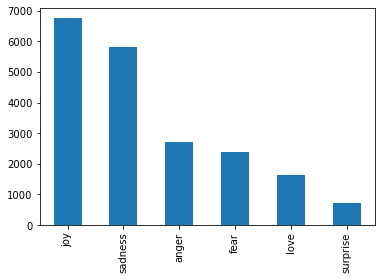

In [10]:
import matplotlib.pyplot as plt
size = df['label'].value_counts()
size.plot(kind = 'bar')

In [17]:
#Segment Embedding 과정 때 2개의 문장을 하나의 Segment로 지정하는데 이 때 하나의 Segment에
#있는 sub_word(한글자씩 쪼개고 빈번하게 겹치는 글자들은 합치는 것)의 최대 개수를 설정하는 것
#BERT의 논문에는 512개로 설정되어있으니 따라할게요.
max_len = 512

#토큰화 유닛 설정
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                        do_lower_case=True)

#토큰화(WordPiece Embedding & Segment Embedding 방식)
input_ids = [tokenizer.encode(sent,
                            add_special_tokens=True,#시작점에 [CLS], 끝점에 [SEP]
                            max_length=max_len,
                            padding='max_length') for sent in posts]


print(posts[2])
print(labels[2])
print(input_ids[2])

#position Embedding(토큰의 위치정보만 고려하는 임베딩방식)
attention_mask = []
attention_masks = [[float(i>0) for i in seq] for seq in input_ids]
print(attention_masks[2])

im grabbing a minute to post i feel greedy wrong
1
[101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [12]:
from sklearn.model_selection import train_test_split

#데이터 나누기
train_inputs1,validation_inputs1,train_labels1,validation_labels1 = train_test_split(input_ids, labels,random_state=789,test_size=0.2)
train_masks1,validation_masks1,_,_ = train_test_split(attention_masks,input_ids,random_state=789,test_size=0.2)

In [14]:
import torch

#데이터 텐서화
def gotensor(inputs, label, mask):
    inputs = torch.tensor(inputs)
    label = torch.tensor(label)
    mask = torch.tensor(mask)
    return inputs, label, mask
    
train_inputs, train_labels, train_masks = gotensor(train_inputs1,train_labels1,train_masks1)
validation_inputs, validation_labels, validation_masks = gotensor(validation_inputs1,validation_labels1,validation_masks1)

In [15]:
train_inputs[2]

tensor([  101,  1045,  2514,  2008,  1996,  4471,  2003,  2205, 20342,  2030,
         2242,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [16]:
train_labels[2]

tensor(0)

In [22]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#데이터 배치사이즈로 수정
batch_size = 64

#한곳에 다 넣어두고
train_data = TensorDataset(train_inputs,train_masks,train_labels)
#데이터를 섞고
train_sampler = RandomSampler(train_data)
#배치사이즈로 나눠준다.
train_dataloader = DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)

#동일함
validation_data = TensorDataset(validation_inputs,validation_masks,validation_labels)
validation_sampler = RandomSampler(validation_data)
validation_dataloader = DataLoader(validation_data,sampler=validation_sampler,batch_size=batch_size)

In [23]:
train_dataloader

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=6).to(device)
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
num_epoch = 3
total_steps = len(train_dataloader)*num_epoch

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps= total_steps)



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
model.zero_grad()

loss_values = []

for epoch in range(num_epoch):

    total_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device)
        b_input_label = batch[1].to(device)
        b_input_mask = batch[2].to(device)

        model.zero_grad()
        outputs = model(b_input_ids,
                        token_type_ids = None,
                        attention_mask = b_input_mask,
                        labels = b_input_label)
        
        loss = outputs[0]

        total_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)

        optimizer.step()

        scheduler.step()
    
    avg_train_loss = total_loss/len(train_dataloader)

    loss_values.append(avg_train_loss)
